*DECISION TREE*

In [2]:
import functools

from sklearn import tree
from sklearn import ensemble
import numpy as np
import matplotlib.pylab as plt

In [3]:
np.random.seed(1)

In [4]:
# create data set (sin curve)
num_samples = 201
X = np.linspace(-np.pi, np.pi, num_samples).reshape(-1, 1)
y = np.sin(X.ravel()) + np.random.normal(0, 0.1, size=num_samples)

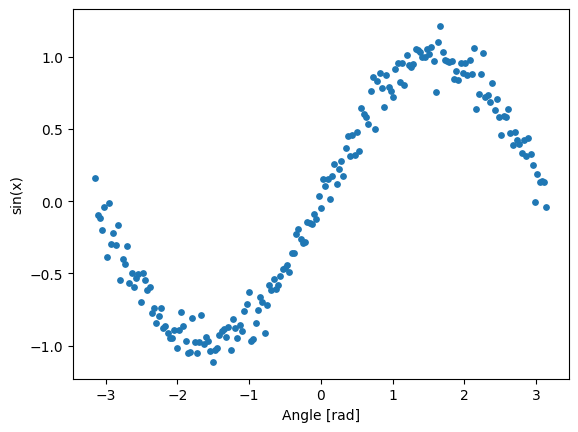

In [5]:
# visualize data
plt.scatter(X.ravel(), y, s=15)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

**Decision Tree**

1. Data collection: Gather a dataset consisting of labeled examples, where each example has a set of input features and a corresponding output or target value.

2. Feature selection: Determine which features from the dataset should be used as inputs for the decision tree. The goal is to choose the most relevant features that can effectively predict the target value.

3. Building the tree: Start with the root node, which represents the entire dataset. Select a feature to split the data based on some criteria (e.g., entropy or Gini impurity). This feature should create subsets of data that are more homogeneous in terms of the target value.

4. Splitting the data: Divide the dataset based on the chosen feature into subsets, creating child nodes. Each child node represents a unique value or range of values for the selected feature. Repeat the splitting process recursively for each child node until a termination condition is met. This condition could be reaching a maximum depth, having a minimum number of samples in a node, or other stopping criteria.

5. Assigning predictions: Once the splitting process is complete, assign a prediction or outcome to each leaf node. The prediction could be the majority class of the samples in the leaf node or a probabilistic estimate based on the distribution of target values.

6. Making predictions: Given a new input instance, traverse the decision tree from the root node down to a leaf node, following the decision rules at each internal node. Once a leaf node is reached, the predicted outcome associated with that leaf node is used as the final prediction for the input instance.

In [6]:
clf = tree.DecisionTreeRegressor(max_depth=2, random_state=1)
clf = clf.fit(X, y)

Question 1: Can you guess the following predictions given the prediction for -1 is known?

In [7]:
clf.predict([[-1]])

array([-0.69496961])

In [8]:
# clf.predict([[-1.5]])

In [9]:
# clf.predict([[-2]])

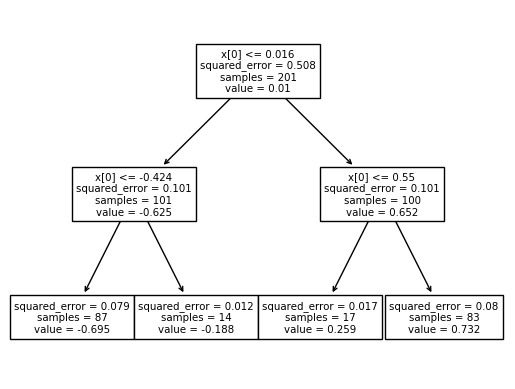

In [10]:
tree.plot_tree(clf)
plt.show()

In [11]:
y_pred = clf.predict(X).ravel()

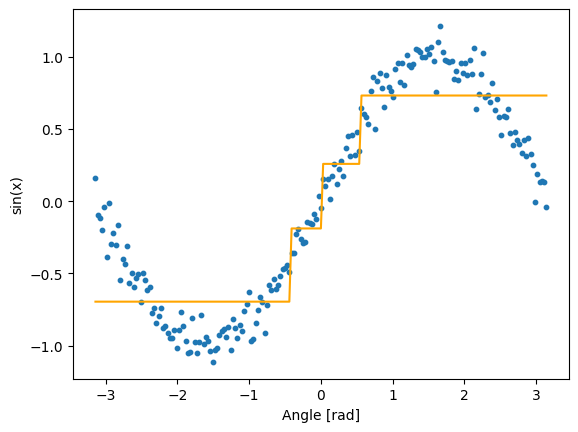

In [12]:
# visualize data with predictions
plt.scatter(X.ravel(), y, s=10)
plt.plot(X.ravel(), y_pred, color="orange")
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

**RANDOM FOREST**

Building a Random Forest:

Random Forest consists of a collection or ensemble of decision trees. The number of trees to include in the forest is a parameter that can be specified.
Each decision tree in the Random Forest is built using a subset of the training data, created through a process called bootstrapping. Bootstrapping involves randomly sampling the training data with replacement, resulting in multiple subsets of the data.
For each subset of the data, a decision tree is constructed using a process similar to regular decision tree algorithms, such as the ID3 or CART algorithm.
However, during the construction of each tree, at each split, only a random subset of features (rather than all features) is considered as candidates for the split. This random selection of features introduces additional randomness and diversity into the forest.

Making Predictions:

To make predictions using a Random Forest, the predictions from all the individual trees are combined or aggregated. The specific method of aggregation depends on the task, such as classification or regression:
For classification tasks, the most common method of aggregation is voting. Each tree in the Random Forest predicts the class label, and the class with the majority of votes across all the trees is selected as the final prediction.
For regression tasks, the predictions from each tree are averaged to obtain the final prediction. The average accounts for the diversity in predictions provided by different trees.

In [13]:
# bootstrapping from original dataset
all_indices = list(range(num_samples))
idx1 = np.random.choice(all_indices, size=num_samples, replace=True)
idx2 = np.random.choice(all_indices, size=num_samples, replace=True)
idx3 = np.random.choice(all_indices, size=num_samples, replace=True)

In [14]:
def print_info_bootstrapping(indices, order):
  unique_elems = set(indices)
  print(f"{order} dataset contains {len(unique_elems)} elements from total {num_samples} elements, ratio: {len(unique_elems) / num_samples:.3f}")

print_info_bootstrapping(idx1, "First")
print_info_bootstrapping(idx2, "Second")
print_info_bootstrapping(idx3, "Third")

First dataset contains 129 elements from total 201 elements, ratio: 0.642
Second dataset contains 129 elements from total 201 elements, ratio: 0.642
Third dataset contains 126 elements from total 201 elements, ratio: 0.627


In [15]:
def print_number_of_common_elements(list_of_indices):
    print(f"Number of common data points in all data sets: {len(functools.reduce(lambda x, y: set(x).intersection(set(y)), list_of_indices))}")

In [16]:
print_number_of_common_elements([idx1, idx2, idx3])

Number of common data points in all data sets: 49


In [17]:
clf1 = tree.DecisionTreeRegressor(max_depth=2, max_features=1, random_state=1)
clf1 = clf1.fit(X[idx1], y[idx1])

clf2 = tree.DecisionTreeRegressor(max_depth=2, max_features=1, random_state=2)
clf2 = clf2.fit(X[idx2], y[idx2])

clf3 = tree.DecisionTreeRegressor(max_depth=2, max_features=1, random_state=3)
clf3 = clf3.fit(X[idx3], y[idx3])

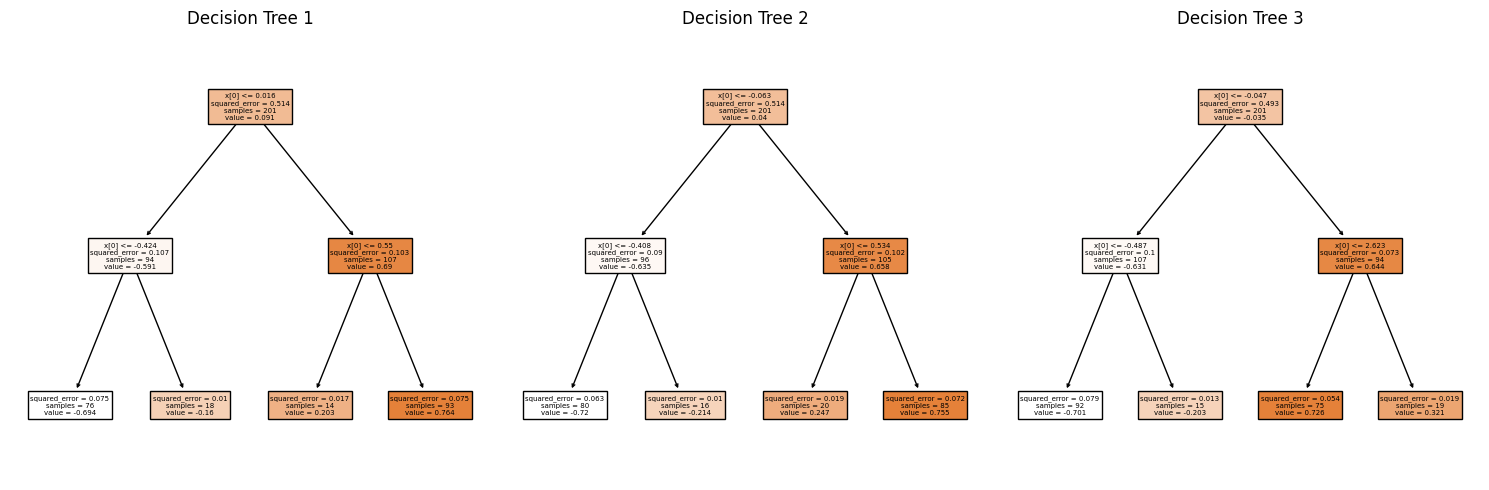

In [18]:
# Plot the decision trees
plt.figure(figsize=(15, 5))

plt.subplot(131)
tree.plot_tree(clf1, filled=True)
plt.title("Decision Tree 1")

plt.subplot(132)
tree.plot_tree(clf2, filled=True)
plt.title("Decision Tree 2")

plt.subplot(133)
tree.plot_tree(clf3, filled=True)
plt.title("Decision Tree 3")

plt.tight_layout()
plt.show()

In [19]:
y_pred = (clf1.predict(X) + clf2.predict(X) + clf3.predict(X)) / 3

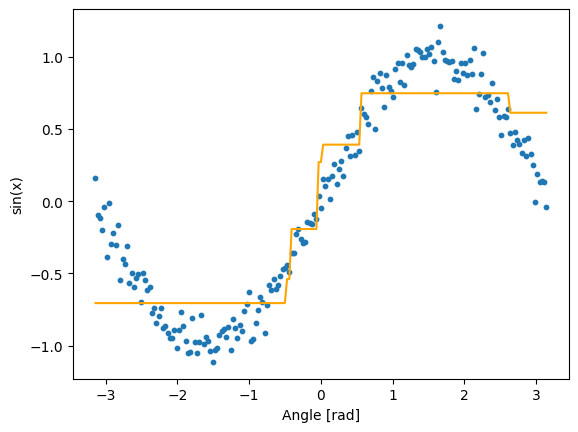

In [20]:
# visualize data with predictions
plt.scatter(X.ravel(), y, s=10)
plt.plot(X.ravel(), y_pred, color="orange")
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [21]:
mse1 = np.mean((y - clf1.predict(X)) ** 2)
mse2 = np.mean((y - clf2.predict(X)) ** 2)
mse3 = np.mean((y - clf3.predict(X)) ** 2)
mse = np.mean((y - y_pred) ** 2)

In [22]:
print(f"MSE for individual decision trees is {mse1:.3f}, {mse2:.3f}, and {mse3:.3f}, respectively. However, MSE of RF is {mse:.3f}!")

MSE for individual decision trees is 0.070, 0.070, and 0.077, respectively. However, MSE of RF is 0.062!


In [23]:
# larger example with more trees
datasets = []
for i in range(10):
  datasets.append(np.random.choice(all_indices, size=num_samples, replace=True))

clfs = [tree.DecisionTreeRegressor(max_depth=2, random_state=rnd_idx).fit(X[idx], y[idx]) for rnd_idx, idx in enumerate(datasets)]
y_pred = np.mean([clf.predict(X) for clf in clfs], axis=0)

In [24]:
mse = np.mean((y - y_pred) ** 2)
print(f"MSE of RF is {mse:.3f}.")

MSE of RF is 0.049.


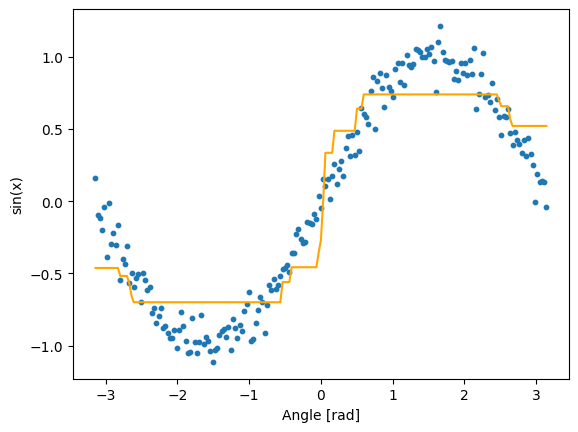

In [25]:
# visualize data with predictions
plt.scatter(X.ravel(), y, s=10)
plt.plot(X.ravel(), y_pred, color="orange")
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [26]:
rf = ensemble.RandomForestRegressor(n_estimators=100, max_depth=2, random_state=1)

In [27]:
rf = rf.fit(X, y)

In [ ]:
# You can explore individual decision trees using:
# UNCOMMENT: rf.estimators_

In [28]:
y_pred = rf.predict(X)

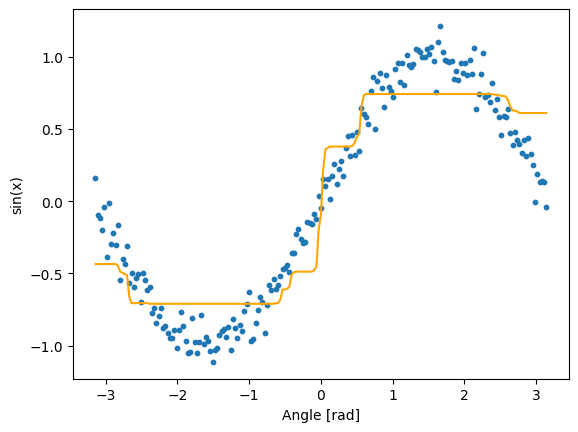

In [29]:
# visualize data with predictions
plt.scatter(X.ravel(), y, s=10)
plt.plot(X.ravel(), y_pred, color="orange")
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

Question 2: How could we improve the performance of our model?

Some ideas:

* Number of trees (n_estimators): Increasing the number of trees in the forest can improve performance up to a certain point. More trees allow for better capturing of complex relationships in the data but may also increase training and inference time.

* Maximum depth (max_depth): Controlling the maximum depth of each decision tree can prevent overfitting. Shallower trees limit the complexity of the model and reduce the chances of capturing noise in the data.

* Minimum samples for a split (min_samples_split): Specifying a minimum number of samples required to split a node can prevent overfitting and control the tree growth. Increasing this parameter helps in building more generalized trees.

* Feature subset size (max_features): Limiting the number of features considered for each split can add randomness to the model and reduce correlation among trees. You can set it to a fraction of the total features or a specific number of features.

* Randomness: Randomness is inherent in Random Forest models, but you can control it further by setting random_state or using different random number generator seeds. This ensures reproducibility and stability of the model.

* Cross-validation: Perform cross-validation to assess the model's performance on different subsets of the data. This helps in tuning hyperparameters and detecting overfitting.

* Feature selection: Consider performing feature selection techniques to identify the most informative features for the task. This can enhance model performance by reducing noise and improving interpretability.

* Regularization: Regularization techniques, such as limiting the maximum number of leaf nodes (max_leaf_nodes) or applying min_samples_leaf, can prevent overfitting and improve generalization.

* Ensemble size: Adjust the size of the ensemble by changing the number of decision trees in the Random Forest. More trees can lead to better performance, but there is a trade-off with computational resources.

* Model evaluation: Assess the model's performance using appropriate evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), or R-squared. Regularly monitor the model's performance on a validation set or through cross-validation.

In [30]:
rf.feature_importances_

array([1.])

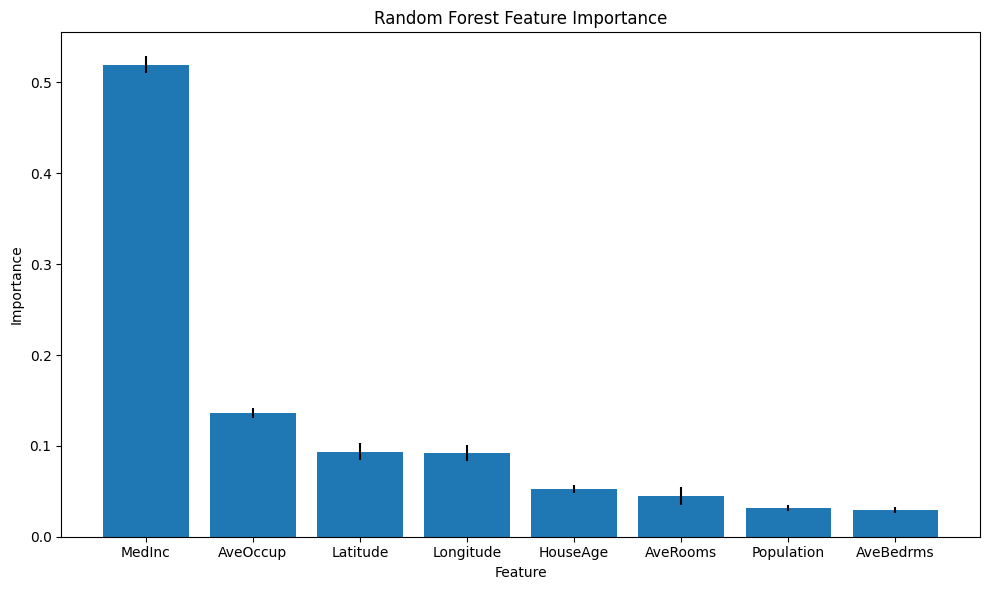

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = np.array(housing.feature_names)

# Create a Random Forest Regressor with 100 trees
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)
rf_regressor.fit(X, y)

# Get feature importances
importances = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()